# Task 1

Import packages

In [ ]:
!pip install PyPDF2

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import PyPDF2
import re
from collections import Counter

Upload resume file

In [6]:
from google.colab import files

In [8]:
uploaded = files.upload()

Saving Rice Davis Resume.pdf to Rice Davis Resume (1).pdf


Read resume PDF as a list of words

In [13]:
filename = "Rice Davis Resume.pdf"

# Read PDF text
text = ""
with open(filename, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages:
        text += page.extract_text()


resume_words = re.findall(r'\b\w+\b', text.lower())
#print(resume_words)

['rice', 'davis', 'trd7', 'email', 'sc', 'edu', '203', '520', '5755', 'redding', 'ct', 'education', 'university', 'of', 'south', 'carolina', 'molinaroli', 'college', 'of', 'engineering', 'and', 'computing', 'columbia', 'sc', 'candidate', 'for', 'bachelor', 'of', 'science', 'in', 'computer', 'engineering', 'expected', 'may', '2026', 'major', 'computer', 'engineering', 'minor', 'business', 'administration', 'concentration', 'data', 'science', 'gpa', '3', '95', '4', '0', 'achieved', 'dean', 's', 'list', '5', 'consecutive', 'semesters', 'presidents', 'list', '4', '6', 'semesters', 'activities', 'tau', 'beta', 'pi', 'professional', 'engineering', 'fraternity', 'member', 'of', 'pi', 'kappa', 'phi', 'fraternity', 'intramural', 'soccer', 'technical', 'skills', 'languages', 'python', 'r', 'sql', 'c', 'tech', 'stack', 'git', 'databricks', 'jupyter', 'notebook', 'anaconda', 'pycharm', 'spotfire', 'tableau', 'ms', 'office', 'professional', 'experience', 'asml', 'wilton', 'ct', 'business', 'enginee

## a. Histogram of top 20 resume_words

In [67]:
# Count word frequencies
resume_word_counter = Counter(resume_words)

# Get the 20 most common words and their counts
top_20_resume_words = resume_word_counter.most_common(20)
top_20_words, top_20_counts = zip(*top_20_resume_words)

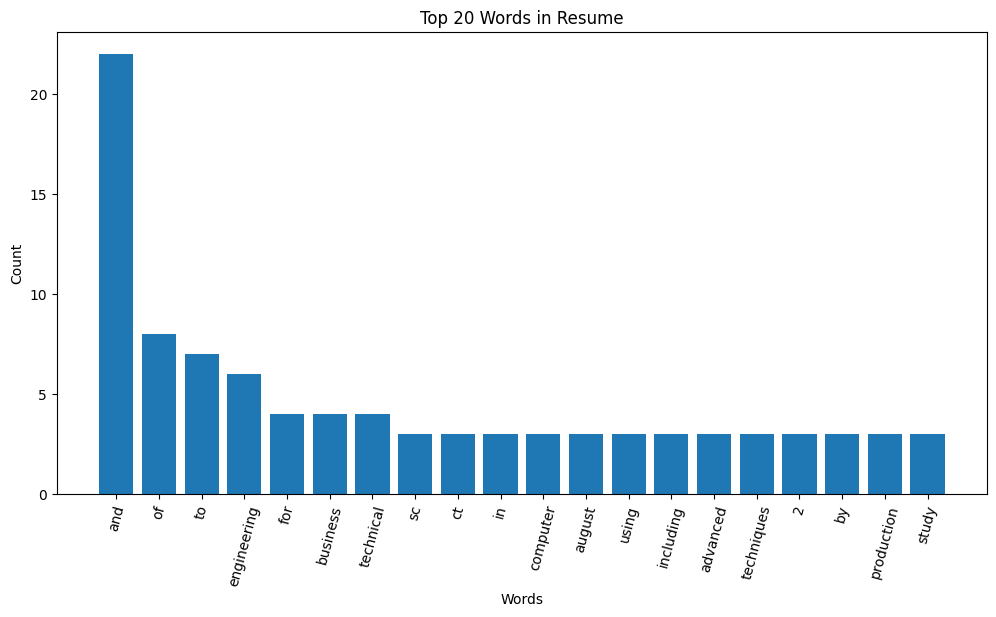

In [68]:
plt.figure(figsize=(12,6))
plt.bar(top_20_words, top_20_counts)
plt.xticks(rotation=75)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 Words in Resume")
plt.show()

## b. Removing stop words from resume

In [40]:
# Open the file and read all lines
with open("/content/stop_word_list.csv", "r") as f:
    stop_words = f.read().splitlines()

In [45]:
specific_words = [w for w in resume_words if w not in stop_words]

In [62]:
specific_word_counts = Counter(specific_words)

top_20_specific_words = specific_word_counts.most_common(20)
words, counts = zip(*top_20_specific_words)

Histogram for top 20 specific_words

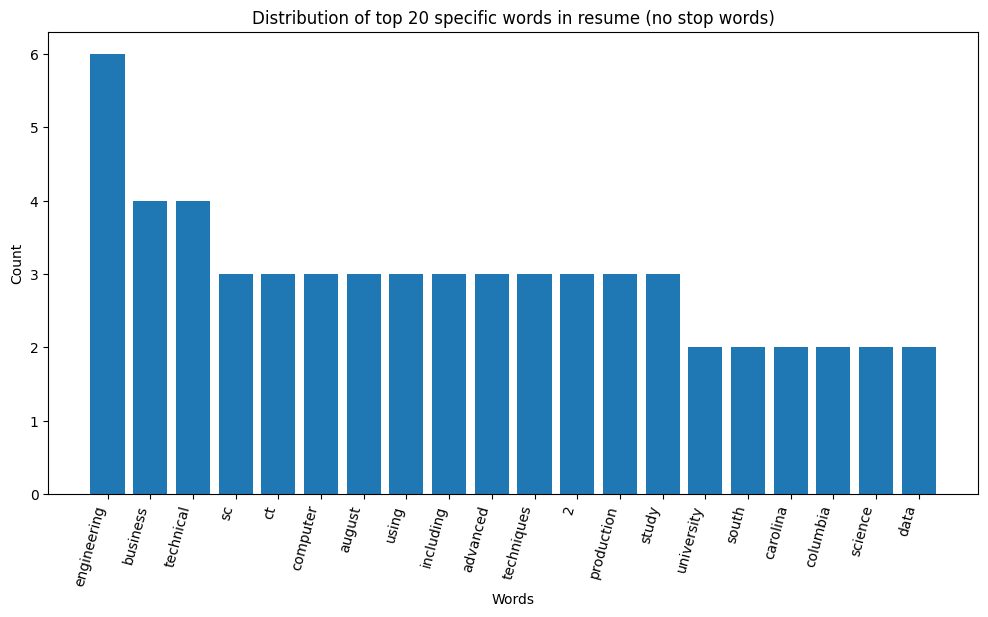

In [65]:
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=75, ha='right')
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Distribution of top 20 specific words in resume (no stop words)")
plt.show()

# c. Analysis

By removing the stop words, it is clear to see now my resume is heavily focused on my engineering, business and technical skills based on the occurances of these words in the histogram.

# Task 2